<h1>Astro 283 Homework 6</h1>
Bijan Pourhamzeh


In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv
from scipy.optimize import fmin
from csv import reader
from __future__ import print_function

<h3> Problem 1 </h3>

In [37]:
#Read in student samples

samples = reader(open('rice.dat', 'rt'))
x_dat = []
for sam in samples:
    x_dat.append(float(sam[0]))
    
x_dat = np.array(x_dat)
print(x_dat)

[  7.893145   12.87092    17.9159      0.4349276   0.3306195   2.932549
  23.8691      3.448594    7.779337    0.3736466   3.784709    2.782
  17.8508      2.528774    2.853153   23.90128    13.02464     0.6660353
   1.794565   18.14342     1.376215    2.798997    6.412296   29.86244
   7.839873    6.570388    0.2057757   3.163097   11.91203    12.5479
   1.469301   12.02533     0.7435214   1.707394    1.048436    7.447414
   1.359778    6.859517    6.13546     2.64491    29.92344    12.15828
   7.446064    0.8170959   2.124207    2.968172    6.390549    0.6565358
   7.063244    2.490683 ]


In [35]:
def rice_likelihood(params, x):
    return 1/params[0]*np.exp(-(x+params[1])/params[0])*iv(0,2*np.sqrt(x*params[1])/params[0])

neg_RL = lambda params, x: -1*np.prod(rice_likelihood(params,x))

In [41]:
initial = np.array([5,0])
opt = fmin(neg_RL, initial, args=(x_dat,))

print(opt)

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 29
         Function evaluations: 55
[  7.22612374e+00   7.86827536e-04]


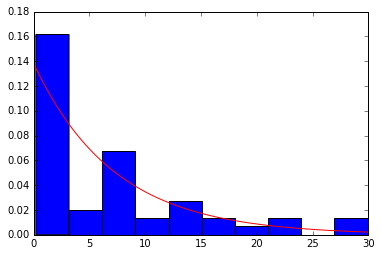

In [42]:
plt.hist(x_dat, normed=True)

x_vals = np.arange(0,30,.01)
plt.plot(x_vals, rice_likelihood(opt,x_vals), 'r-')

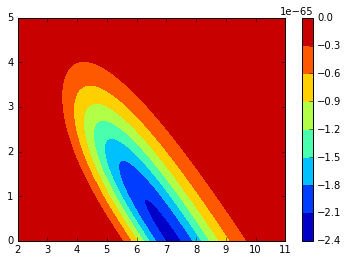

In [40]:
alp = np.linspace(2,11,100)
bet = np.linspace(0,5,100)
prob = np.array([[neg_RL((a,b),x_dat) for a in alp] for b in bet])
plt.contourf(alp, bet, prob)
plt.colorbar()

<h3>Problem 2</h3>